In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# import numpy as np
# from keras.models import Sequential
# from keras.layers import LSTM, Dense



Univariate time series example - regression

In [2]:
# Define input sequence
sequence = [0,1,1,2,3,5,8,13,21,34,55,89]


# Define number of time steps and number of features
n_steps = 2
n_features = 1



In [ ]:
# 0, 1 ->1
# 1,1 -> 2
#  1,2 ->3




# 34,55 -> 89

In [5]:
sequence[1:3]

[1, 1]

In [6]:
sequence[3]

2

In [ ]:
len(sequence)-n_steps

10

In [7]:

# Split the input sequence into samples with a sliding window of n_steps
X = []
y = []

for i in range(len(sequence)-n_steps):
    X.append(sequence[i:i+n_steps])
    y.append(sequence[i+n_steps])
X = np.array(X)
y = np.array(y)


In [8]:
X

array([[ 0,  1],
       [ 1,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  5],
       [ 5,  8],
       [ 8, 13],
       [13, 21],
       [21, 34],
       [34, 55]])

In [9]:
y

array([ 1,  2,  3,  5,  8, 13, 21, 34, 55, 89])

In [10]:
X.shape

(10, 2)

In [11]:

# Reshape input data to be 3D [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(10, 2, 1)

In [ ]:
X

array([[[ 0],
        [ 1]],

       [[ 1],
        [ 1]],

       [[ 1],
        [ 2]],

       [[ 2],
        [ 3]],

       [[ 3],
        [ 5]],

       [[ 5],
        [ 8]],

       [[ 8],
        [13]],

       [[13],
        [21]],

       [[21],
        [34]],

       [[34],
        [55]]])

In [12]:
# Load Data
# florida = pd.read_csv('github/florida_file_.csv')
from google.colab import drive
drive.mount('/content/drive')

florida = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekday_batch/AI and Deep Learning using TensorFLow/Module 6/In-Class Demo/florida_file.csv")
florida["Date"] = pd.to_datetime(florida["Date"])

Mounted at /content/drive


In [13]:
florida.head()

,Date,Avg_Temp,confidence_interval_temp,State,Country,Year,Month,Day
0,1743-11-01,17.694,2.514,Florida,United States,1743,11,1
1,1743-12-01,22.978,2.470,Florida,United States,1743,12,1
2,1744-01-01,22.978,2.470,Florida,United States,1744,1,1
3,1744-02-01,22.978,2.470,Florida,United States,1744,2,1
4,1744-03-01,22.978,2.470,Florida,United States,1744,3,1


In [15]:
florida = florida[["Date", "Avg_Temp"]]
florida = florida.fillna(florida.bfill())
florida.columns = ['Date', 'Avg_Temp']
florida.head()

,Date,Avg_Temp
0,1743-11-01,17.694
1,1743-12-01,22.978
2,1744-01-01,22.978
3,1744-02-01,22.978
4,1744-03-01,22.978


In [16]:
florida.tail()

,Date,Avg_Temp
3234,2013-05-01,23.576
3235,2013-06-01,27.432
3236,2013-07-01,27.327
3237,2013-08-01,28.188
3238,2013-09-01,27.493


In [ ]:
florida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3239 non-null   datetime64[ns]
 1   Avg_Temp  3239 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.7 KB


In [18]:
train = florida[:-225]
print(len(train))


3014


In [19]:
train.tail()

,Date,Avg_Temp
3009,1994-08-01,27.040
3010,1994-09-01,26.031
3011,1994-10-01,23.479
3012,1994-11-01,21.581
3013,1994-12-01,17.296


In [21]:
test = florida[-225:]
print(len(test))
test.head()

225


,Date,Avg_Temp
3014,1995-01-01,14.450
3015,1995-02-01,15.590
3016,1995-03-01,19.629
3017,1995-04-01,21.649
3018,1995-05-01,25.963


In [22]:
train_dates = pd.to_datetime(train['Date'])
test_dates  = pd.to_datetime(test['Date'])


In [23]:
# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['Avg_Temp'].values.reshape(-1,1))


In [26]:
train['Avg_Temp'].values.reshape(-1,1).shape

(3014, 1)

In [25]:
train['Avg_Temp'].shape

(3014,)

In [ ]:
scaled_data.shape

(3014, 1)

In [29]:
prediction_days = 120

x_train = []
y_train = []


In [27]:
(scaled_data[0:225,0]).shape

(225,)

In [30]:
for x in range(0, len(scaled_data)-prediction_days):
    x_train.append(scaled_data[x:x+prediction_days, 0])
    y_train.append(scaled_data[x+prediction_days, 0])

In [31]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [32]:
x_train.shape

(2894, 120)

In [33]:
y_train.shape

(2894,)

In [34]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [35]:
x_train.shape

(2894, 120, 1)

In [36]:
# Build The Model
model = Sequential()

model.add(LSTM(units =64, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =64, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next value

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 64)           16896     
                                                                 
 dropout (Dropout)           (None, 120, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 64)           33024     
                                                                 
 dropout_1 (Dropout)         (None, 120, 64)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

Epoch 1/15
82/82 [==============================] - 30s 244ms/step - loss: 0.0778 - val_loss: 0.0507
Epoch 2/15
82/82 [==============================] - 17s 203ms/step - loss: 0.0482 - val_loss: 0.0444
Epoch 3/15
82/82 [==============================] - 19s 233ms/step - loss: 0.0472 - val_loss: 0.0457
Epoch 4/15
82/82 [==============================] - 17s 203ms/step - loss: 0.0461 - val_loss: 0.0423
Epoch 5/15
82/82 [==============================] - 17s 203ms/step - loss: 0.0450 - val_loss: 0.0385
Epoch 6/15
82/82 [==============================] - 17s 211ms/step - loss: 0.0292 - val_loss: 0.0051
Epoch 7/15
82/82 [==============================] - 17s 205ms/step - loss: 0.0134 - val_loss: 0.0040
Epoch 8/15
82/82 [==============================] - 17s 202ms/step - loss: 0.0118 - val_loss: 0.0042
Epoch 9/15
82/82 [==============================] - 17s 207ms/step - loss: 0.0100 - val_loss: 0.0047
Epoch 10/15
82/82 [==============================] - 18s 218ms/step - loss: 0.0091 - val_lo

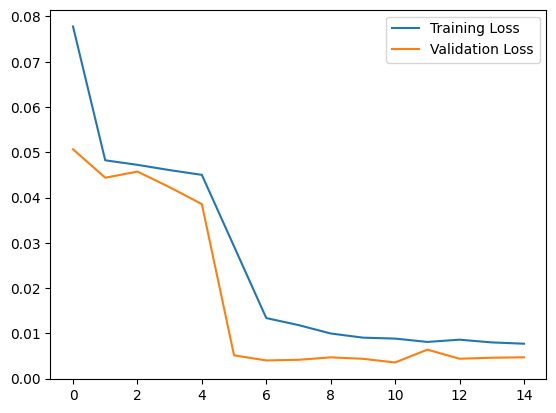

In [37]:
history = model.fit(x_train, y_train, epochs = 15, batch_size=32, validation_split=0.1)


plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [ ]:
# train.tail(2)

In [38]:
### Test the Model Accuracy on Existing Data ###
################################################
# take Test data Again
test.head()


,Date,Avg_Temp
3014,1995-01-01,14.450
3015,1995-02-01,15.590
3016,1995-03-01,19.629
3017,1995-04-01,21.649
3018,1995-05-01,25.963


In [39]:
actual_temp = test['Avg_Temp'].values
total_temp = pd.concat((train['Avg_Temp'], test['Avg_Temp']),axis=0)


In [40]:
total_temp

0       17.694
1       22.978
2       22.978
3       22.978
4       22.978
         ...  
3234    23.576
3235    27.432
3236    27.327
3237    28.188
3238    27.493
Name: Avg_Temp, Length: 3239, dtype: float64

In [41]:
print(len(total_temp))
print(len(test))
print(prediction_days)

3239
225
120


In [42]:
3239-225-120

2894

In [43]:
model_inputs = total_temp[len(total_temp)-len(test)-prediction_days:].values

In [44]:
model_inputs.shape

(345,)

In [45]:
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


In [46]:
model_inputs.shape

(345, 1)

In [49]:
# Make Predictions on Test Data
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [51]:
x_test.shape

(225, 120, 1)

In [53]:

pred = model.predict(x_test)
pred


8/8 [==============================] - 1s 51ms/step


array([[0.21846816],
       [0.2711025 ],
       [0.38263786],
       [0.51852804],
       [0.6422519 ],
       [0.73262316],
       [0.77070886],
       [0.75359076],
       [0.6548105 ],
       [0.49486685],
       [0.332848  ],
       [0.23658177],
       [0.2181831 ],
       [0.2758888 ],
       [0.39106086],
       [0.52731144],
       [0.650661  ],
       [0.7402876 ],
       [0.77753204],
       [0.76000553],
       [0.6642235 ],
       [0.5081448 ],
       [0.34533274],
       [0.2431181 ],
       [0.21620849],
       [0.2646794 ],
       [0.37442324],
       [0.510672  ],
       [0.63512206],
       [0.72605354],
       [0.7655857 ],
       [0.75035053],
       [0.6547267 ],
       [0.4973005 ],
       [0.337296  ],
       [0.24065906],
       [0.22059353],
       [0.27683568],
       [0.39108992],
       [0.52642626],
       [0.64782935],
       [0.7347291 ],
       [0.7698474 ],
       [0.7476968 ],
       [0.64237756],
       [0.47823447],
       [0.3190428 ],
       [0.228

In [54]:
pred = scaler.inverse_transform(pred)
pred

array([[15.064191 ],
       [16.265728 ],
       [18.811857 ],
       [21.913958 ],
       [24.738327 ],
       [26.801321 ],
       [27.670742 ],
       [27.27997  ],
       [25.025015 ],
       [21.373821 ],
       [17.675255 ],
       [15.477688 ],
       [15.057684 ],
       [16.37499  ],
       [19.004137 ],
       [22.114466 ],
       [24.930288 ],
       [26.976286 ],
       [27.826502 ],
       [27.426407 ],
       [25.239895 ],
       [21.67693  ],
       [17.960257 ],
       [15.626901 ],
       [15.012607 ],
       [16.1191   ],
       [18.624332 ],
       [21.73462  ],
       [24.575565 ],
       [26.65135  ],
       [27.553791 ],
       [27.206001 ],
       [25.023102 ],
       [21.429377 ],
       [17.776793 ],
       [15.5707655],
       [15.112709 ],
       [16.396605 ],
       [19.0048   ],
       [22.09426  ],
       [24.865648 ],
       [26.849396 ],
       [27.651075 ],
       [27.145424 ],
       [24.741196 ],
       [20.994137 ],
       [17.36011  ],
       [15.28

In [55]:
test['pred_temp'] = pred

<ipython-input-55-65813035a0c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_temp'] = pred


In [57]:
test.tail(25)

,Date,Avg_Temp,pred_temp
3214,2011-09-01,27.038,24.966534
3215,2011-10-01,22.167,21.116280
3216,2011-11-01,20.093,17.389400
3217,2011-12-01,18.021,15.322103
3218,2012-01-01,16.006,15.089849
3219,2012-02-01,18.432,16.560345
3220,2012-03-01,21.678,19.297850
3221,2012-04-01,22.084,22.451639
3222,2012-05-01,25.550,25.274836
3223,2012-06-01,26.598,27.236973


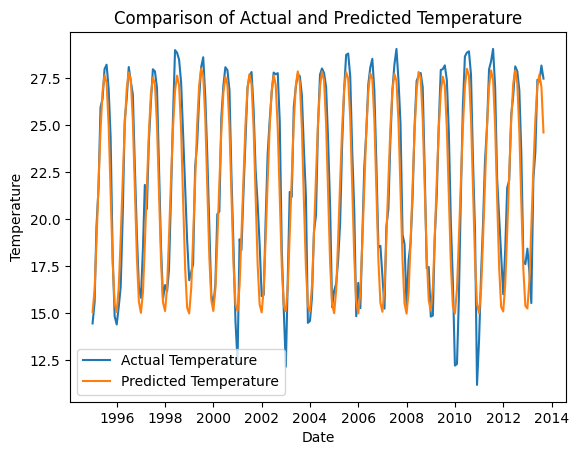

In [58]:
# prompt: can you plot the above data. date on xaxis, remaining 2 features on y axis as a lineplot

import matplotlib.pyplot as plt

plt.plot(test_dates, test["Avg_Temp"], label="Actual Temperature")
plt.plot(test_dates, test["pred_temp"], label="Predicted Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Comparison of Actual and Predicted Temperature")
plt.legend()
plt.show()
